<a href="https://colab.research.google.com/github/allansuzuki/sales_predict/blob/main/Sales_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install dependencies
!pip install sgs
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
!pip install prophet
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main.py", line 9, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/main_parser.py", line 8, in <module>
    from pip._internal.cli import cmdoptions
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.parser import ConfigOptionParser
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/parser.py", line 12, in <module>
    from pip._internal.configuration 

In [ ]:
#@title
#import datasets'
import pandas as pd
import sgs
import matplotlib.pyplot as plt
from datetime import datetime as dt
import numpy as np

# Search for Retail sales series
search_list = sgs.search.search_ts(query="Varejo",language='pt')
# save metadata
sales_metadata = search_list[1]

# #import Sales serie (id 1455)
today = dt.today().strftime("%d/%m/%Y")
sales = sgs.time_serie(1455,start='01/01/2000',end=today) #22 years of series  # already pd.Series
sales.name = 'Sales'

#set y variable as the on to be predicted
Y=sales


#About Sales Forecast

All the data come from a system of time series from Brazil Central Bank (SGS - Sistema Gerenciador de Séries temporais) [(+info)](https://www3.bcb.gov.br/sgspub).

Through this management system, it's possible to import time series datasets of various indexes and economy information, such as national wage, taxes indexes, import and export indexes, and so on.

Our main dataset is **Retail Sales** or *Sales volume index in the retail sector - Total - Brazil* monthly values.

#Exploratory Data Analysis (EDA)

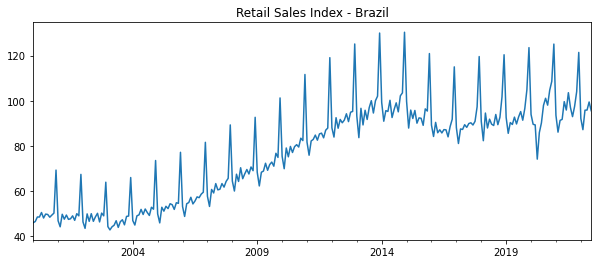

In [ ]:
Y.plot(figsize=(10,4),title='Retail Sales Index - Brazil');

In [ ]:
#@title
# import pandas-profiling
from pandas_profiling import ProfileReport

#generate profile report
rpt = ProfileReport(sales.to_frame(sales.name))

#show report
rpt.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

As it can be seen above, the data is a time structure of sales index <u>by month</u>.

#Model Building

In [ ]:
#import facebook prophet
from prophet import Prophet

In [ ]:
#instanciate
m = Prophet()

In [ ]:
#prepare data: 
# time variable must be named 'ds'
# value variable must be names 'y'
y = Y.to_frame().reset_index().set_axis(['ds','y'],axis=1)



In [ ]:
#train test split
def split_train_test (df,frac):
  train,test = df.iloc[:-(int(len(df)*frac))],df.iloc[int(-(len(df)*frac)):]
  return train,test

test_fraction = .1 # 10%
train,test = split_train_test(y,test_fraction)

In [ ]:
#train model
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm9_jylj/mpoc7hk2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm9_jylj/zpnk3y8e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95670', 'data', 'file=/tmp/tmpjm9_jylj/mpoc7hk2.json', 'init=/tmp/tmpjm9_jylj/zpnk3y8e.json', 'output', 'file=/tmp/tmpa1kpn_iw/prophet_model-20220908142247.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:22:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:22:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#in-sample forecast: if no df provide, is made an in-sample prediction
y_pred = m.predict()

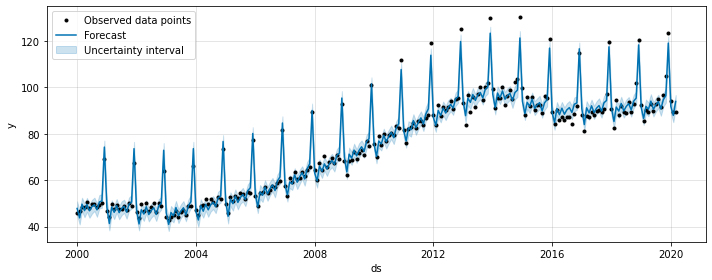

In [ ]:
#plot in-sample prediction
m.plot(y_pred,include_legend=True,figsize=(10,4));

In [ ]:
#import cross validation
from prophet.diagnostics import cross_validation
# metrics = ['rmse','mape','coverage']
# df_cv =  pd.DataFrame()
df_cv = cross_validation(m,horizon='120 days');  #return df with cross_val

INFO:prophet:Making 115 forecasts with cutoffs between 2001-02-09 00:00:00 and 2019-11-02 00:00:00


  0%|          | 0/115 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm9_jylj/xsztg7vo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm9_jylj/ea5mx2r2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12576', 'data', 'file=/tmp/tmpjm9_jylj/xsztg7vo.json', 'init=/tmp/tmpjm9_jylj/ea5mx2r2.json', 'output', 'file=/tmp/tmpfix1xfee/prophet_model-20220908142253.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
14:22:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm9_jylj/tyh9pmxc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjm9_jylj/xc

In [ ]:
#import performance_metrics
from prophet.diagnostics import performance_metrics

#generate performance df
perf = performance_metrics(df_cv,rolling_window=.1)

perf

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,13 days,15.969463,3.996181,2.797783,0.035177,0.019901,0.034449,0.437037
1,14 days,15.647791,3.955729,2.705545,0.033706,0.018690,0.032971,0.484444
2,15 days,15.586178,3.947933,2.692934,0.033338,0.018690,0.032614,0.520000
3,16 days,15.847295,3.980866,2.757544,0.033949,0.019901,0.033263,0.500000
4,17 days,15.285865,3.909714,2.707715,0.033505,0.018999,0.032859,0.496296
...,...,...,...,...,...,...,...,...
103,116 days,124.598161,11.162355,5.227020,0.079792,0.030068,0.092839,0.366667
104,117 days,124.745599,11.168957,5.278667,0.081607,0.037064,0.094691,0.338889
105,118 days,124.258193,11.147116,5.314539,0.082102,0.042933,0.095183,0.288889
106,119 days,125.872075,11.219272,5.411992,0.083066,0.042933,0.096119,0.266667


/usr/local/lib/python3.7/dist-packages/prophet/plot.py:544: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])
/usr/local/lib/python3.7/dist-packages/prophet/plot.py:545: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').astype(np.int64) / float(dt_conversions[i])


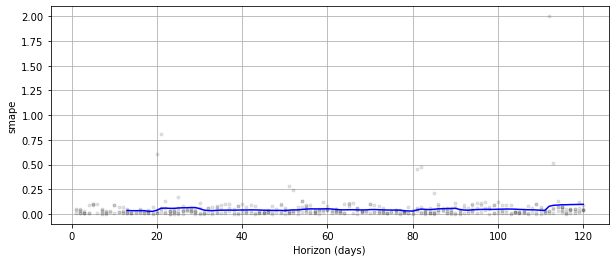

In [ ]:
#import plot cross val
from prophet.plot import plot_cross_validation_metric

#plot cross_val_metrics by horizon
plot_cross_validation_metric(df_cv,point_color='black',figsize=(10,4),metric='smape');

#Model Evaluation

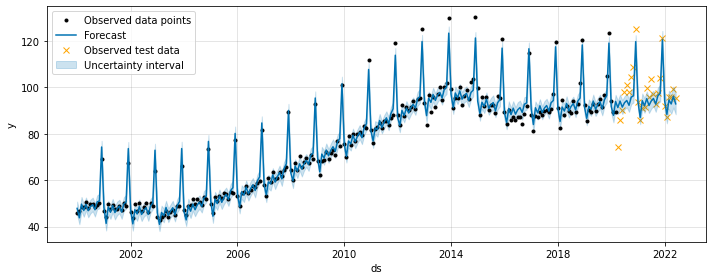

In [ ]:
#@title
#forecast test
period = test.index[-1]-y_pred.index[-1]  #days diff
df_future = m.make_future_dataframe(periods=period,freq='MS')
y_pred_fut = m.predict(df_future)

#plot true x forecast TEST
m.plot(y_pred_fut,include_legend=True,figsize=(10,4));
#plot observed test data
plt.plot(test.set_index('ds'),color='orange',marker='x',linestyle='',label='Observed test data',zorder=-10);
plt.legend();

Função de avaliação de modelo:

In [ ]:
#@title
#error functions
from sklearn.metrics import r2_score
from sktime.performance_metrics.forecasting import mean_squared_error,mean_absolute_percentage_error

def utheil(y_true,y_pred):
  num = sum(abs(y_true-y_pred))
  den = sum(abs(y_true.diff().dropna()))
  utheil = 1-num/den
  return utheil

def mean_directional_error(y_true,y_pred):
  #if direction step1 = pred step 1
  true_sign = np.sign(y_true.diff().dropna())
  pred_sign = np.sign(y_pred.diff().dropna())
  return (true_sign==pred_sign).mean()

def evaluate_model(y_true,y_pred):
  rmse = mean_squared_error(y_true,y_pred,square_root=True)
  smape = mean_absolute_percentage_error(y_true,y_pred,symmetric=True)
  r2 = r2_score(y_true,y_pred)
  uth = utheil(y_true,y_pred)
  sign = mean_directional_error(y_true,y_pred)
  data = np.array([rmse,smape,r2,uth,sign]).reshape(1,-1)
  values = pd.DataFrame(data,columns=['rmse','smape','r2','utheil','mde'])
  display(values)



In [ ]:
#@title
pred = y_pred_fut['yhat'].iloc[-period:]
true = test['y']

print('error values in test')
evaluate_model(true,pred)

error values in test


,rmse,smape,r2,utheil,mde
0,5.884591,0.045128,0.656422,0.446815,0.846154


In [ ]:
#@title
print('comparizon to error values in train')
display(perf[['horizon','rmse','smape']].loc[7:7])

comparizon to error values in train


,horizon,rmse,smape
7,20 days,4.509511,0.037961


#Forecasting

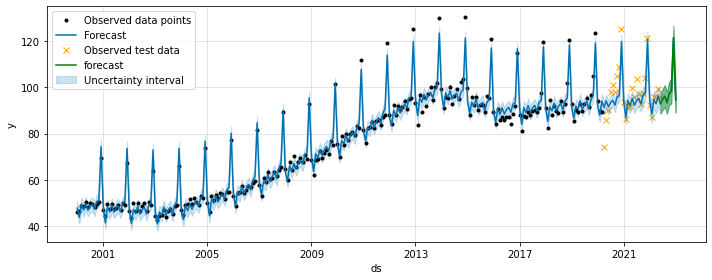

In [ ]:
#@title
from datetime import datetime as dt
import datetime

#set dates
end_of_the_year = '2022-12-01'
actual = dt.strftime(train['ds'].iloc[-1],"%Y-%m-%d")
#get periods
period = len(pd.date_range(actual,end_of_the_year,freq="MS"))
#make future df
fut_df = m.make_future_dataframe(periods=period,freq='MS')

#predict
y_pred_forec = m.predict(fut_df)

#plot
m.plot(y_pred_forec,figsize=(10,4),include_legend=True);
#plot observed test data
plt.plot(test.set_index('ds'),color='orange',marker='x',linestyle='',label='Observed test data',zorder=-10);

#plot forecast
y_forec = y_pred_forec.loc[y_pred_forec['ds']>=test['ds'].iloc[-1]][['ds','yhat']].set_index('ds')
y_forecfill = y_pred_forec.loc[y_pred_forec['ds']>=test['ds'].iloc[-1]][['ds','yhat_upper','yhat_lower']].set_index('ds')
plt.fill_between(y_forecfill.index,y_forecfill['yhat_lower'],y_forecfill['yhat_upper'],color='g',alpha=.4);
plt.plot(y_forec,'-g',label='forecast');
plt.legend(loc=0);

* How the predictions can be used?

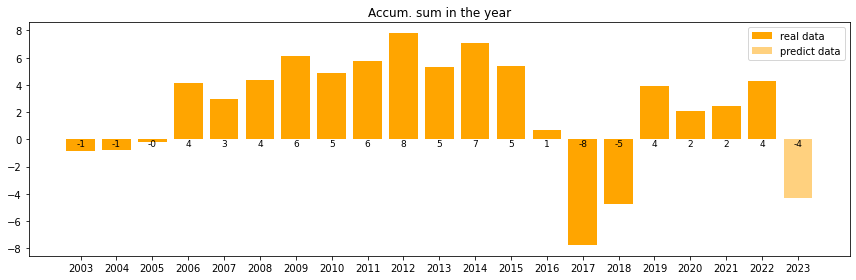

In [ ]:
#@title
#generate accumulate Index per year
#join real data and test
merge_data_forecast = y.set_index('ds')\
.append(y_forec.loc[y_forec.index>'2022-06-01'].rename({'yhat':'y'},axis=1))

#cumsum by year
data_month_year = merge_data_forecast.assign(mes = merge_data_forecast.index.strftime('%m')).assign(ano = merge_data_forecast.index.strftime('%Y'))
data_month_year['y'] = data_month_year['y'].rolling(window=6).mean()
dataBeginYear = data_month_year.loc[data_month_year['mes']=='01']
valAno = dataBeginYear['ano'].shift()
cumYear = dataBeginYear['y'].diff().to_frame().assign(ano=valAno.values).dropna().set_index('ano')['y']

#plot accumaltive over year
fig,ax = plt.subplots(figsize=(12,4))
ax.bar(x=cumYear.index[:-1],height=cumYear.values[:-1],label='real data',color='orange')
ax.bar(x=cumYear.index[-1:],height=cumYear.values[-1:],label='predict data',color='orange',alpha=.5)
ax.set_title('Accum. sum in the year');
#label data in each bar
for xtext,ytext in cumYear.items():
  ax.text(xtext,0,f'{ytext:.0f}',fontsize=9,ha='center',va='top');
ax.legend()
fig.tight_layout()

It's possible to see how the index varies in the year and, regarding to any business related to the sales index, for example, predict **how much effort** in resources it is needed to run the business until the end of the year and also forecast the following year.

#Conclusion

AutoML or low-code algorithms come in handy when the focus is not related build a specific model, but to understand the data and its possibilities in a case study.
In others words, to **focus more in the business approach** than the scientifical.

Thus, applying the machine learning mindset, we analyze the retail sales index in Brazil and understood it's components to build a time series machine learning model.

Eventhough the model is preset, the model must be evaluated and tested to guarantee at least the business rules are appied (seasonality, cyclicity, trend,...), as we saw, for example, that every December has a peak in the year and January suffers a huge drop.

Finally, after having a good model, it can be used to forecast values and **assist** the decisions makers and stakeholders <u>data-drivenly</u>, as analyzed before, that the effort needed by the end of 2022 is lower than the year before. This can lead to the best scenario to invest internally than care about the sales in during the year.